## Topic Model Diary Chunk Prep

## Resources

In [2]:
# Packages
import pandas as pd
import gensim
import gensim.corpora as corpora
import numpy as np
#from gensim.utils import simple_preprocess
import spacy
import pickle
from collections import Counter
from matplotlib import pyplot as plt

In [3]:
# Functions for lemmatization and conversion of texts into list of lowercase tokens

def lemmatization(texts, allowed_postags=['NOUN', 'VERB']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

def text_to_words(texts):
    for text in texts:
        yield(gensim.utils.simple_preprocess(str(text), 
                                             deacc=True, # removes accents
                                             min_len=3))   # removes tokens shorter than three characters

In [4]:
# Initialize spacy 'en' model
# python3 -m spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

## Get Data

In [243]:
# Narratives
df = pd.read_csv("20240701_PhD_Data4TopicModel-DiaryChunk.csv") 
df = df.rename(columns={'Unnamed: 0':'docID-AT'}) # Change column name to "docID-AT"
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   docID-AT          1023 non-null   int64  
 1   docid             1023 non-null   object 
 2   docyear           1023 non-null   int64  
 3   docmonth          0 non-null      float64
 4   authorName        1023 non-null   object 
 5   docauthorid       1023 non-null   object 
 6   authorLocation    1023 non-null   object 
 7   authorGender      1023 non-null   object 
 8   nationalOrigin    921 non-null    object 
 9   irish             921 non-null    object 
 10  otherUK           921 non-null    object 
 11  relMin            1023 non-null   bool   
 12  catholic          1023 non-null   bool   
 13  otherChristian    1023 non-null   bool   
 14  U                 1023 non-null   bool   
 15  M                 1023 non-null   bool   
 16  S                 1023 non-null   bool   


In [6]:
# Convert values in text to list of strings (objects)
data = df.text.values.tolist()
print(data[0])

Charra Wednesday Nov 4th 1883 A nice cool day Mrs Roberts and I were talking nearly the whole night feel very tired today Tom left just after breakfast for Mr Hiern's Station he will not be back until Sunday or Monday he is talking of going out to the new Tanks over 100 miles from here if he can make sure of getting water I Darned up the socks and Stockings I had with me and cut out some under clothes. Charra Thursday Nov 8th North wind first thing this morning with heavy thunder but only a few drops of rain I was so sleepy did not get up till very late had been hand sewing which is very tiresome My throat keep very sore still the Cold has not nearly left one Worrier ill with cold our Black Boy Charra Friday Nov 9th We have had thunder and lightning with a little rain off and on all day I have been sewing all day but Mrs Roberts keeps me talking after going to bed till all hours of the night so that I can't get up in the morning have had a head ache all day from want of rest and sittin

## Tokenize

In [7]:
# Convert to tokens
data_words = list(text_to_words(data))
print(data_words[0])

['charra', 'wednesday', 'nov', 'nice', 'cool', 'day', 'mrs', 'roberts', 'and', 'were', 'talking', 'nearly', 'the', 'whole', 'night', 'feel', 'very', 'tired', 'today', 'tom', 'left', 'just', 'after', 'breakfast', 'for', 'hiern', 'station', 'will', 'not', 'back', 'until', 'sunday', 'monday', 'talking', 'going', 'out', 'the', 'new', 'tanks', 'over', 'miles', 'from', 'here', 'can', 'make', 'sure', 'getting', 'water', 'darned', 'the', 'socks', 'and', 'stockings', 'had', 'with', 'and', 'cut', 'out', 'some', 'under', 'clothes', 'charra', 'thursday', 'nov', 'north', 'wind', 'first', 'thing', 'this', 'morning', 'with', 'heavy', 'thunder', 'but', 'only', 'few', 'drops', 'rain', 'was', 'sleepy', 'did', 'not', 'get', 'till', 'very', 'late', 'had', 'been', 'hand', 'sewing', 'which', 'very', 'tiresome', 'throat', 'keep', 'very', 'sore', 'still', 'the', 'cold', 'has', 'not', 'nearly', 'left', 'one', 'worrier', 'ill', 'with', 'cold', 'our', 'black', 'boy', 'charra', 'friday', 'nov', 'have', 'had', 'th

## Lemmatize

In [8]:
# Do lemmatization keeping nouns and verbs
data_lemmatized = lemmatization(data_words)
print(data_lemmatized[0])

['day', 'talk', 'night', 'feel', 'today', 'leave', 'breakfast', 'hiern', 'station', 'back', 'talk', 'go', 'tank', 'mile', 'make', 'get', 'water', 'darn', 'sock', 'stocking', 'have', 'cut', 'clothe', 'charra', 'wind', 'thing', 'morning', 'thunder', 'drop', 'rain', 'get', 'hand', 'sewing', 'throat', 'keep', 'cold', 'leave', 'worrier', 'boy', 'have', 'thunder', 'lightning', 'rain', 'day', 'sew', 'day', 'keep', 'talk', 'go', 'bed', 'hour', 'night', 'get', 'morning', 'have', 'head', 'ache', 'day', 'want', 'rest', 'sit', 'tonight', 'road', 'mercaney', 'sheep', 'torment', 'child', 'rub', 'grease', 'plate', 'smoke', 'candle', 'mark', 'boy', 'face', 'drink', 'tea', 'kill', 'leave', 'have', 'rain', 'thunder']


In [9]:
counts = Counter(x for sublist in data_lemmatized for x in sublist)
len(Counter(counts))

7065

In [10]:
# Do lemmatization keeping only nouns
data_lemmatizedNouns = lemmatization(data_words, allowed_postags=['NOUN'])
print(data_lemmatizedNouns[0])

['day', 'night', 'today', 'breakfast', 'hiern', 'station', 'tank', 'mile', 'water', 'sock', 'stocking', 'clothe', 'wind', 'thing', 'morning', 'thunder', 'drop', 'rain', 'hand', 'sewing', 'throat', 'cold', 'worrier', 'boy', 'thunder', 'lightning', 'rain', 'day', 'day', 'bed', 'hour', 'night', 'morning', 'head', 'ache', 'day', 'rest', 'tonight', 'road', 'mercaney', 'sheep', 'torment', 'child', 'grease', 'plate', 'candle', 'boy', 'tea', 'kill', 'rain', 'thunder']


In [11]:
countsNouns = Counter(x for sublist in data_lemmatizedNouns for x in sublist)
len(Counter(countsNouns))

5550

## Low and High Frequency Word Removal

no_above means not used by more than x % of documents (or in other words, may be used in up to x % of the corpus). Thus, 50% is more permissive (i.e., keeps more words) than 25%.

In [199]:
## First the unlemmatized set
dctRaw = corpora.Dictionary(data_words)
dctRaw.filter_extremes(no_below=3, no_above=.37) 
len(dctRaw)

4732

In [200]:
corpusRaw = [dctRaw.doc2bow(doc) for doc in data_words]
len(corpusRaw)

1023

In [201]:
## Now lemmatized with only nouns and verbs

dct = corpora.Dictionary(data_lemmatized)
dct.filter_extremes(no_below=3, no_above=.37)
len(dct)

2563

In [202]:
corpus = [dct.doc2bow(doc) for doc in data_lemmatized]
len(corpus)

1023

In [203]:
## Now lemmatized with only nouns

dctNouns = corpora.Dictionary(data_lemmatizedNouns)
dctNouns.filter_extremes(no_below=3, no_above=.37)
len(dctNouns)

2019

In [204]:
corpusNouns = [dctNouns.doc2bow(doc) for doc in data_lemmatizedNouns]
len(corpusNouns)

1023

## Evaluation

### Before High Frequency Word Removal

In [213]:
# First unlemmatized set
lengthsRaw = []

for x in data_words:
    lengthsRaw.append(len(x))

print(max(lengthsRaw))
print(min(lengthsRaw))
print(sum(lengthsRaw)/len(lengthsRaw))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsRaw)), key=lengthsRaw.__getitem__)

241
81
204.55327468230695


548

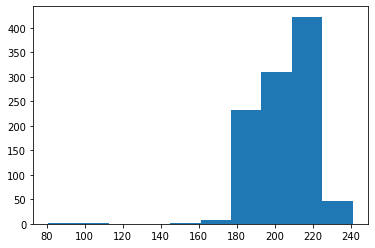

In [214]:
# See the distribution
plt.hist(lengthsRaw, 10)
plt.show()

In [215]:
print(df['text'][548])
print("")
print(data_words[548])

and then we put in and made the boat fast took the things ashore and pitched the tent had some dinner on the ground and then went out roo shooting. we saw a few kangaroos but could not get a shot at one . Returned about sundown and found that our native guide who had been out in his canoe looking for swan eggs and been fortunate enough to catch two swans and also two musk ducks he was eating one of the ducks when we got back. 1862 June 7th Saturday Flora had 4 pups no good.

['and', 'then', 'put', 'and', 'made', 'the', 'boat', 'fast', 'took', 'the', 'things', 'ashore', 'and', 'pitched', 'the', 'tent', 'had', 'some', 'dinner', 'the', 'ground', 'and', 'then', 'went', 'out', 'roo', 'shooting', 'saw', 'few', 'kangaroos', 'but', 'could', 'not', 'get', 'shot', 'one', 'returned', 'about', 'sundown', 'and', 'found', 'that', 'our', 'native', 'guide', 'who', 'had', 'been', 'out', 'his', 'canoe', 'looking', 'for', 'swan', 'eggs', 'and', 'been', 'fortunate', 'enough', 'catch', 'two', 'swans', 'and

In [216]:
# Now the lemmatized noun-verb set
lengths = []

for x in data_lemmatized:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

112
32
87.48387096774194


548

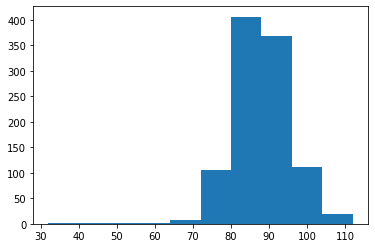

In [217]:
plt.hist(lengths, 10)
plt.show()

In [218]:
print(df['text'][548])
print("")
print(data_lemmatized[548])

and then we put in and made the boat fast took the things ashore and pitched the tent had some dinner on the ground and then went out roo shooting. we saw a few kangaroos but could not get a shot at one . Returned about sundown and found that our native guide who had been out in his canoe looking for swan eggs and been fortunate enough to catch two swans and also two musk ducks he was eating one of the ducks when we got back. 1862 June 7th Saturday Flora had 4 pups no good.

['put', 'make', 'boat', 'take', 'thing', 'pitch', 'tent', 'have', 'dinner', 'ground', 'go', 'shooting', 'see', 'kangaroo', 'shoot', 'return', 'sundown', 'find', 'guide', 'canoe', 'look', 'swan', 'egg', 'catch', 'swan', 'musk', 'duck', 'eat', 'duck', 'get', 'have', 'pup']


In [219]:
lengthsNouns = []

for x in data_lemmatizedNouns:
    lengthsNouns.append(len(x))

print(max(lengthsNouns))
print(min(lengthsNouns))
print(sum(lengthsNouns)/len(lengthsNouns))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsNouns)), key=lengthsNouns.__getitem__)

72
17
51.09286412512219


548

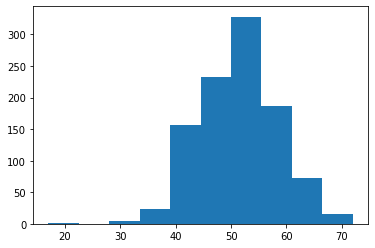

In [220]:
plt.hist(lengthsNouns, 10)
plt.show()

In [221]:
print(df['text'][548])
print("")
print(data_lemmatizedNouns[548])

and then we put in and made the boat fast took the things ashore and pitched the tent had some dinner on the ground and then went out roo shooting. we saw a few kangaroos but could not get a shot at one . Returned about sundown and found that our native guide who had been out in his canoe looking for swan eggs and been fortunate enough to catch two swans and also two musk ducks he was eating one of the ducks when we got back. 1862 June 7th Saturday Flora had 4 pups no good.

['boat', 'thing', 'tent', 'dinner', 'ground', 'shooting', 'kangaroo', 'sundown', 'guide', 'canoe', 'swan', 'egg', 'swan', 'musk', 'duck', 'duck', 'pup']


### After high-frequency word removal

In [222]:
lengthsRaw = []

for x in corpusRaw:
    lengthsRaw.append(len(x))

print(max(lengthsRaw))
print(min(lengthsRaw))
print(sum(lengthsRaw)/len(lengthsRaw))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsRaw)), key=lengthsRaw.__getitem__)

118
37
93.79276637341154


548

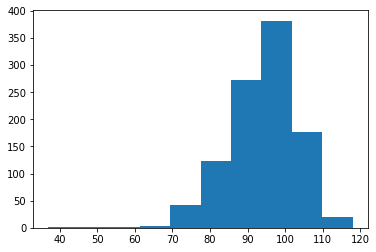

In [223]:
plt.hist(lengthsRaw, 10)
plt.show()

In [224]:
idsRaw = [i[0] for i in corpusRaw[548]]

tokensRaw = []
for id in idsRaw:
    x = dctRaw.get(id)
    tokensRaw.append(x)
print(tokensRaw)

len(tokensRaw)

['back', 'few', 'our', 'saturday', 'two', 'also', 'made', 'fast', 'saw', 'tent', 'enough', 'found', 'put', 'catch', 'took', 'returned', 'things', 'looking', 'who', 'pups', 'eggs', 'boat', 'ground', 'eating', 'swans', 'june', 'sundown', 'ducks', 'swan', 'native', 'ashore', 'shot', 'shooting', 'kangaroos', 'flora', 'pitched', 'guide']


37

In [225]:
lengths = []

for x in corpus:
    lengths.append(len(x))

print(max(lengths))
print(min(lengths))
print(sum(lengths)/len(lengths))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengths)), key=lengths.__getitem__)

75
20
51.283479960899314


548

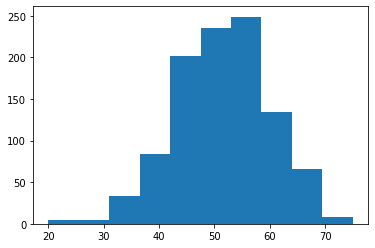

In [226]:
plt.hist(lengths, 10)
plt.show()

In [227]:
ids = [i[0] for i in corpus[548]]

tokens = []
for id in ids:
    x = dct.get(id)
    tokens.append(x)
print(tokens)

len(tokens)

['thing', 'look', 'eat', 'tent', 'find', 'put', 'catch', 'return', 'pup', 'egg', 'boat', 'ground', 'shoot', 'sundown', 'duck', 'swan', 'shooting', 'kangaroo', 'pitch', 'guide']


20

In [228]:
lengthsNouns = []

for x in corpusNouns:
    lengthsNouns.append(len(x))

print(max(lengthsNouns))
print(min(lengthsNouns))
print(sum(lengthsNouns)/len(lengthsNouns))

# Let's have a look at the shortest text
# What one is it?
min(range(len(lengthsNouns)), key=lengthsNouns.__getitem__)

52
11
33.03519061583578


548

In [229]:
idsNouns = [i[0] for i in corpusNouns[548]]

tokensNouns = []
for id in idsNouns:
    x = dctNouns.get(id)
    tokensNouns.append(x)
print(tokensNouns)

len(tokensNouns)

['thing', 'tent', 'pup', 'egg', 'boat', 'ground', 'sundown', 'duck', 'swan', 'shooting', 'kangaroo']


11

### Original versions of shortest units of text

In [230]:
print(df['text'][548])

and then we put in and made the boat fast took the things ashore and pitched the tent had some dinner on the ground and then went out roo shooting. we saw a few kangaroos but could not get a shot at one . Returned about sundown and found that our native guide who had been out in his canoe looking for swan eggs and been fortunate enough to catch two swans and also two musk ducks he was eating one of the ducks when we got back. 1862 June 7th Saturday Flora had 4 pups no good.


## Format for Authorless TM Procedure (low and high-frequency words removed)

In [244]:
df['tmTokes']=data_lemmatized
df['tmTokesString'] = [' '.join(map(str, l)) for l in df['tmTokes']]
cols=['docID-AT', 'docauthorid', 'tmTokesString']
df=df[cols]
df = df.rename(columns={'docID-AT': 'document id', 'docauthorid': 'author label', 'tmTokesString': 'text'}) 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   document id   1023 non-null   int64 
 1   author label  1023 non-null   object
 2   text          1023 non-null   object
dtypes: int64(1), object(2)
memory usage: 24.1+ KB


## Saving work

In [246]:
with open("20240916_PhD_DiaChkNV_Authorless.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatized, fp)

with open("20240916_PhD_DiaChkN_Authorless.txt", "wb") as fp:   #Pickling
    pickle.dump(data_lemmatizedNouns, fp)
    
with open("20240916_PhD_DiaCh_Authorless.txt", "wb") as fp:   #Pickling
    pickle.dump(data_words, fp)

In [247]:
df.to_csv('20240916_PhD_DiaryCorpus.tsv', sep="\t", header=None)

In [248]:
dct.save_as_text("20240916_PhD_DiaryDictionary.txt", sort_by_word=True)